In [28]:
import sklearn
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
import seaborn as sb
import matplotlib.colors as mcolors

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request

In [5]:
modisData=pd.read_csv('modiscali20_23.csv')

In [6]:
modisData.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,33.8041,-115.3785,311.1,1.2,1.1,2020-01-01,1845,Terra,MODIS,71,6.03,288.3,10.5,D,0
1,33.5573,-116.6426,301.7,1.1,1.0,2020-01-01,1845,Terra,MODIS,48,6.03,286.1,5.3,D,0
2,33.8020,-115.3660,306.7,1.2,1.1,2020-01-01,1845,Terra,MODIS,36,6.03,288.4,6.6,D,0
3,33.8062,-115.3910,312.3,1.2,1.1,2020-01-01,1845,Terra,MODIS,72,6.03,288.5,11.5,D,0
4,32.6223,-116.1300,301.5,1.1,1.1,2020-01-01,1845,Terra,MODIS,45,6.03,287.2,4.8,D,0


In [7]:
modisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126390 entries, 0 to 126389
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    126390 non-null  float64
 1   longitude   126390 non-null  float64
 2   brightness  126390 non-null  float64
 3   scan        126390 non-null  float64
 4   track       126390 non-null  float64
 5   acq_date    126390 non-null  object 
 6   acq_time    126390 non-null  int64  
 7   satellite   126390 non-null  object 
 8   instrument  126390 non-null  object 
 9   confidence  126390 non-null  int64  
 10  version     126390 non-null  float64
 11  bright_t31  126390 non-null  float64
 12  frp         126390 non-null  float64
 13  daynight    126390 non-null  object 
 14  type        126390 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 14.5+ MB


In [8]:
modisData.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,126390.000000,126390.000000,126390.000000,126390.000000,126390.000000,126390.000000,126390.000000,126390.000000,126390.000000,126390.000000,126390.000000
mean,39.140479,-120.959409,336.533539,1.667815,1.230103,1434.011108,75.789018,10.180566,297.668268,137.355030,0.020642
std,2.362937,2.150181,31.980449,0.866621,0.259708,651.145916,25.373665,14.527752,12.345015,379.620049,0.204336
min,32.000800,-123.999500,300.000000,1.000000,1.000000,436.000000,0.000000,6.030000,264.900000,0.000000,0.000000
25%,37.421200,-122.876000,315.100000,1.100000,1.000000,636.250000,59.000000,6.030000,290.300000,18.100000,0.000000
50%,39.843750,-121.248350,327.900000,1.300000,1.100000,1836.000000,83.000000,6.030000,295.900000,39.500000,0.000000
75%,40.784500,-119.648225,347.200000,2.000000,1.400000,2054.000000,100.000000,6.030000,303.100000,101.200000,0.000000
max,43.000000,-113.001000,508.800000,4.800000,2.000000,2232.000000,100.000000,61.030000,400.100000,10433.300000,3.000000


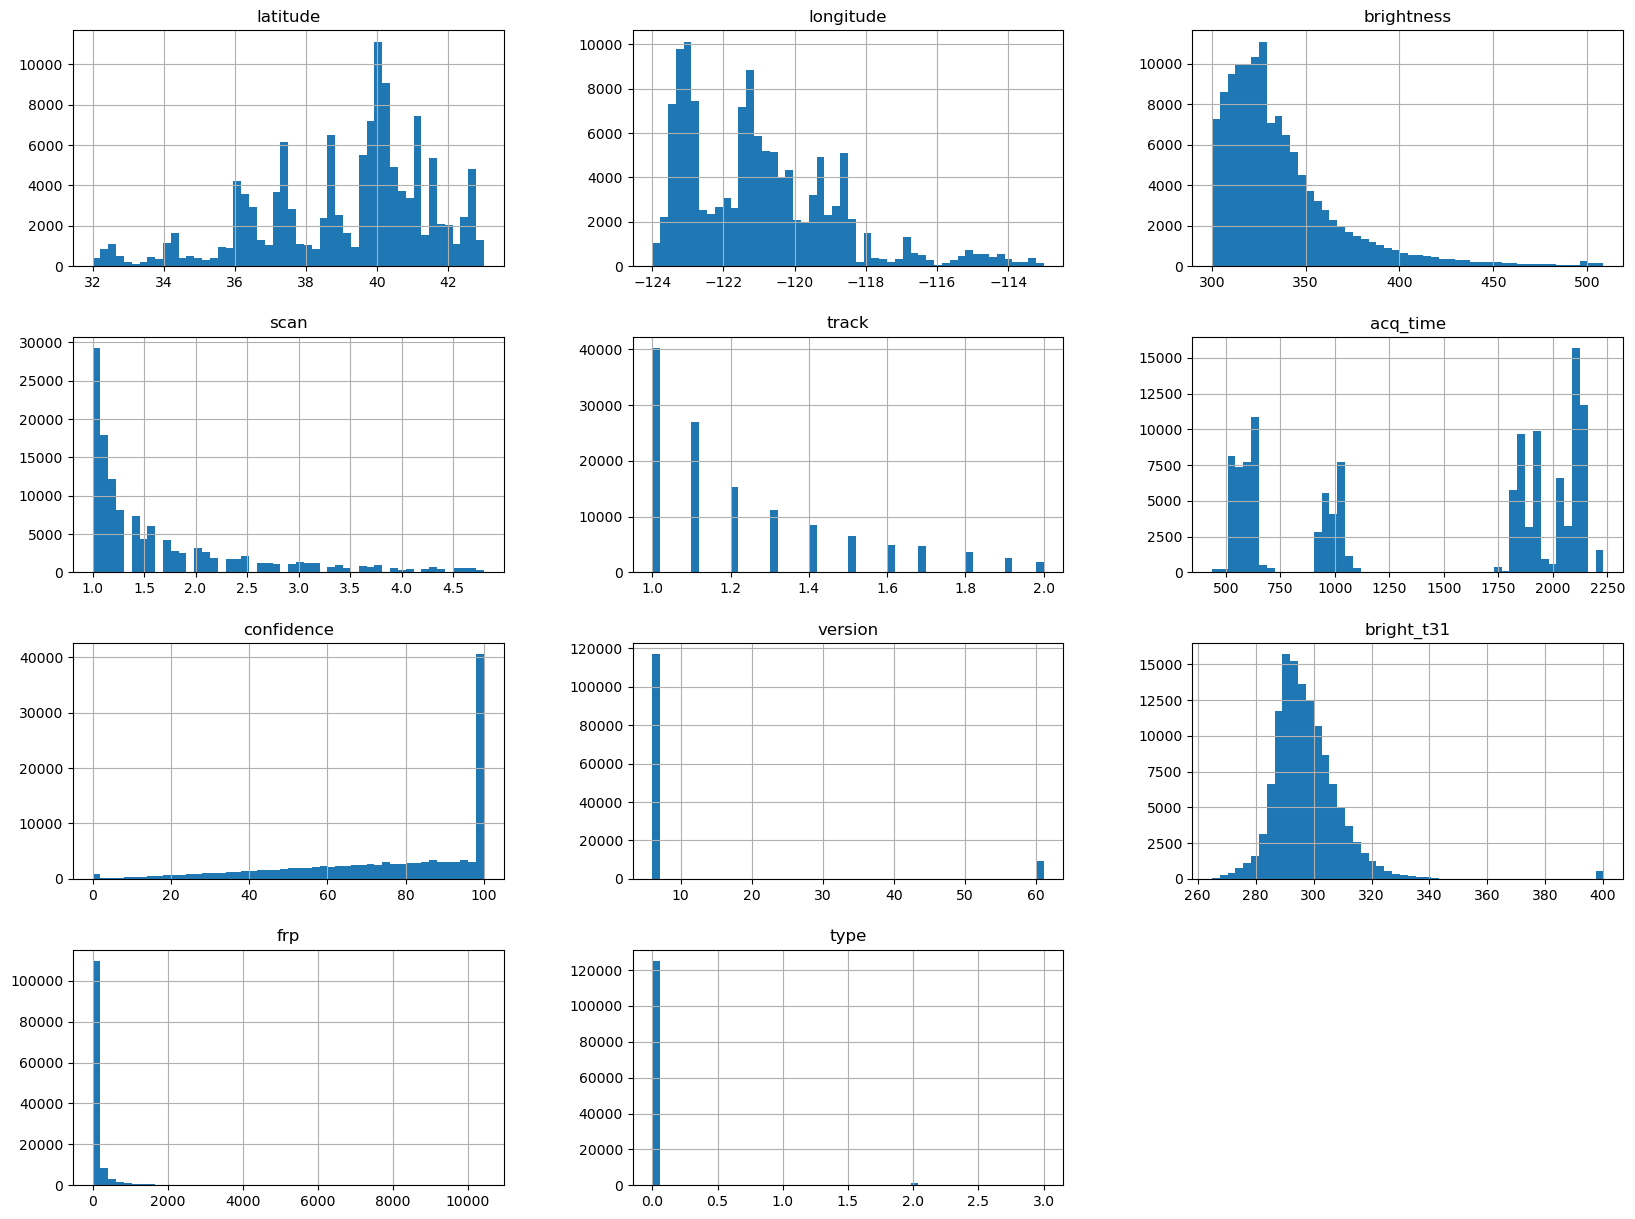

In [9]:
modisData.hist(bins=50, figsize=(20,15)) #bins: number of bars, figsize: figure size (width (x) , height (y))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

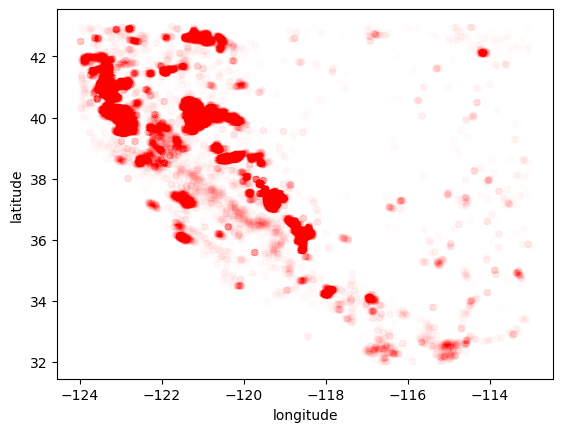

In [39]:
modisData.plot(kind="scatter", x="longitude", y="latitude", alpha=0.005, color="red")

In [11]:
#numeric only deals with ValueError: could not convert string to float
corr_matrix = modisData.corr(numeric_only=True)

<Axes: >

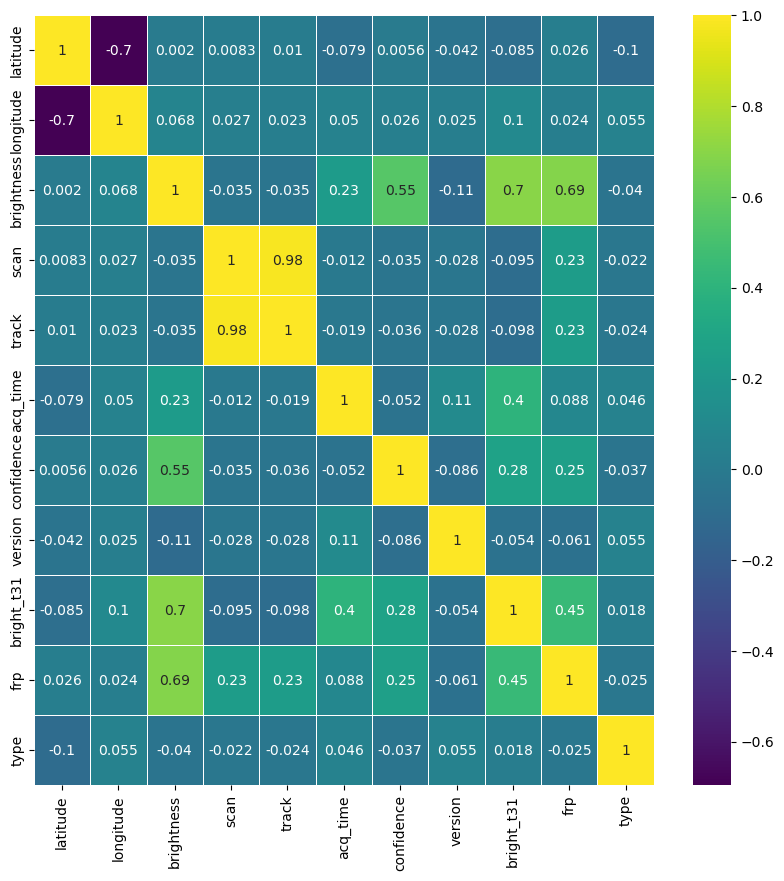

In [18]:
plt.figure(figsize=(10, 10))
sb.heatmap(corr_matrix,annot=True,cmap='viridis',linewidths=.5)

In [29]:
def add_type_columns(df):
  """
  Adds 3 new columns to a DataFrame based on the 'type' column.

  """
  for i in range(4):  # Iterate for types 0, 1, and 2
    df[f'type_{i}'] = (df['type'] == i).astype(int)  

  return df

# Example usage:
modisData = add_type_columns(modisData)
modisData.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,type_0,type_1,type_2,type_3
0,33.8041,-115.3785,311.1,1.2,1.1,2020-01-01,1845,Terra,MODIS,71,6.03,288.3,10.5,D,0,1,0,0,0
1,33.5573,-116.6426,301.7,1.1,1.0,2020-01-01,1845,Terra,MODIS,48,6.03,286.1,5.3,D,0,1,0,0,0
2,33.8020,-115.3660,306.7,1.2,1.1,2020-01-01,1845,Terra,MODIS,36,6.03,288.4,6.6,D,0,1,0,0,0
3,33.8062,-115.3910,312.3,1.2,1.1,2020-01-01,1845,Terra,MODIS,72,6.03,288.5,11.5,D,0,1,0,0,0
4,32.6223,-116.1300,301.5,1.1,1.1,2020-01-01,1845,Terra,MODIS,45,6.03,287.2,4.8,D,0,1,0,0,0


In [30]:
corr_matrix = modisData.corr(numeric_only=True)

<Axes: >

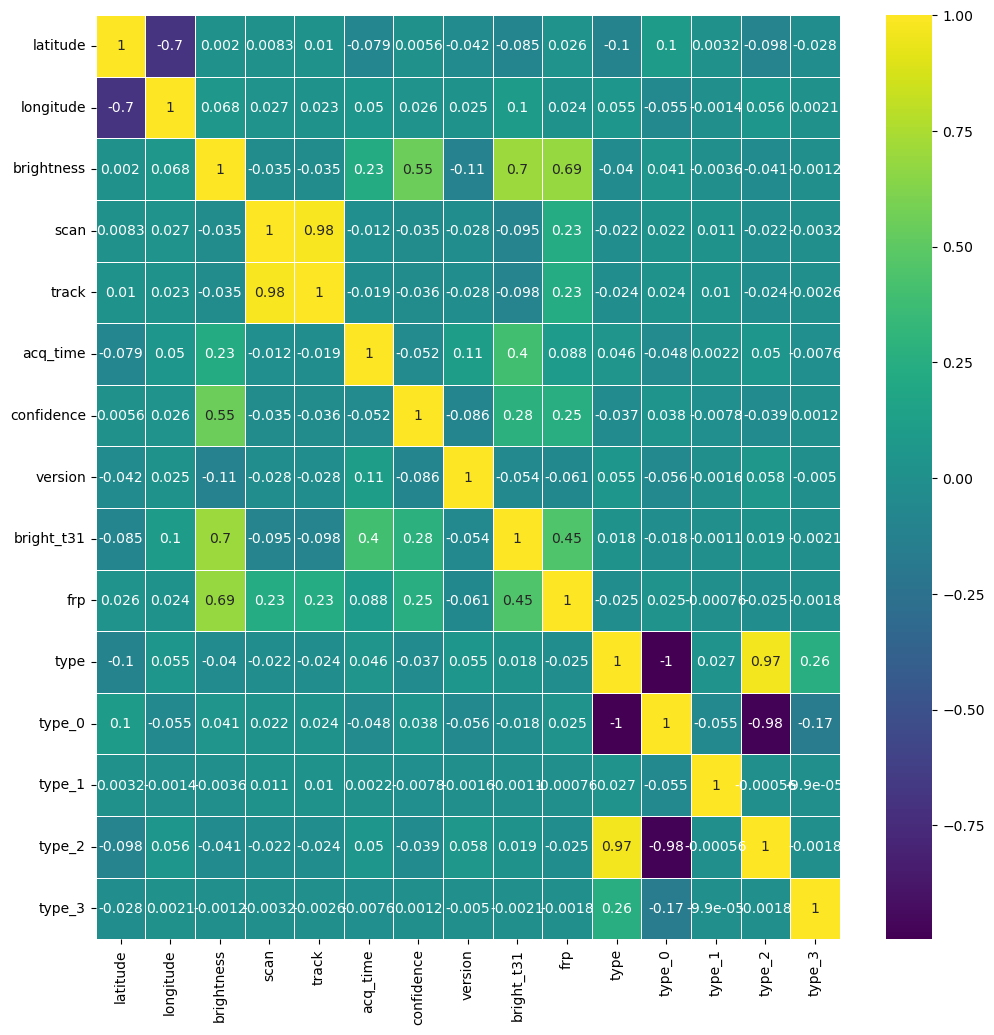

In [31]:
plt.figure(figsize=(12, 12))
sb.heatmap(corr_matrix,annot=True,cmap='viridis',linewidths=.5)

In [13]:
modisData["acq_date"].value_counts()

acq_date
2020-09-09    3200
2020-09-08    2585
2020-08-20    2421
2020-09-14    2228
2020-09-10    2058
              ... 
2022-11-07       1
2022-11-05       1
2022-07-17       1
2022-06-24       1
2022-12-18       1
Name: count, Length: 1389, dtype: int64

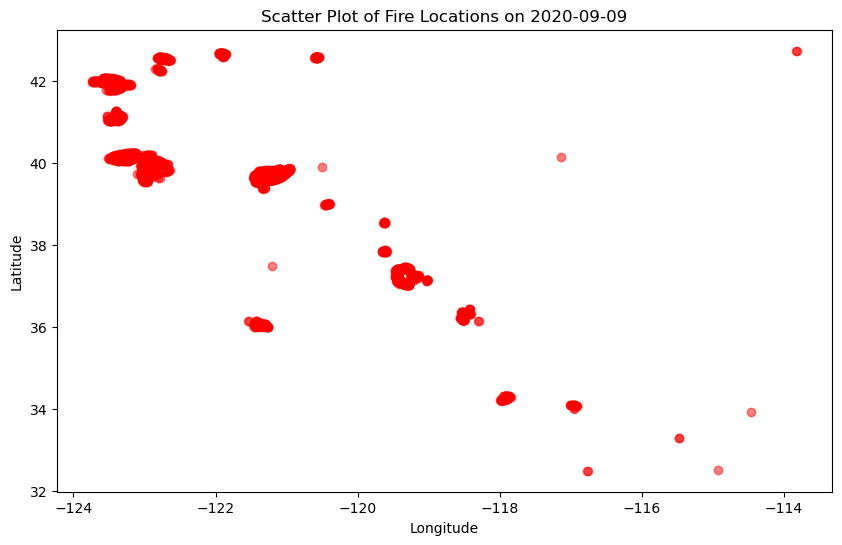

In [41]:
def plot_scatter_for_day(df, date):
  """
  Plots a scatter plot of latitude and longitude coordinates for a specific day.
  """

  # Convert 'acq_date' to datetime objects if it's not already
  modisData['acq_date'] = pd.to_datetime(df['acq_date'])

  # Filter the DataFrame for the specified date
  df_day = modisData[modisData['acq_date'] == date]

  # Create the scatter plot
  plt.figure(figsize=(10, 6))  # Adjust figure size as needed
  plt.scatter(
      df_day['longitude'],
      df_day['latitude'],
      c='red',    # Set marker color
      marker='o',  # Set marker style
      alpha=0.5   # Adjust marker transparency (optional)
  )

  plt.title(f'Scatter Plot of Fire Locations on {date}')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.show()

# Example usage:
plot_scatter_for_day(modisData, '2020-09-09')

In [23]:
df=pd.read_csv('modisfulldata.csv')

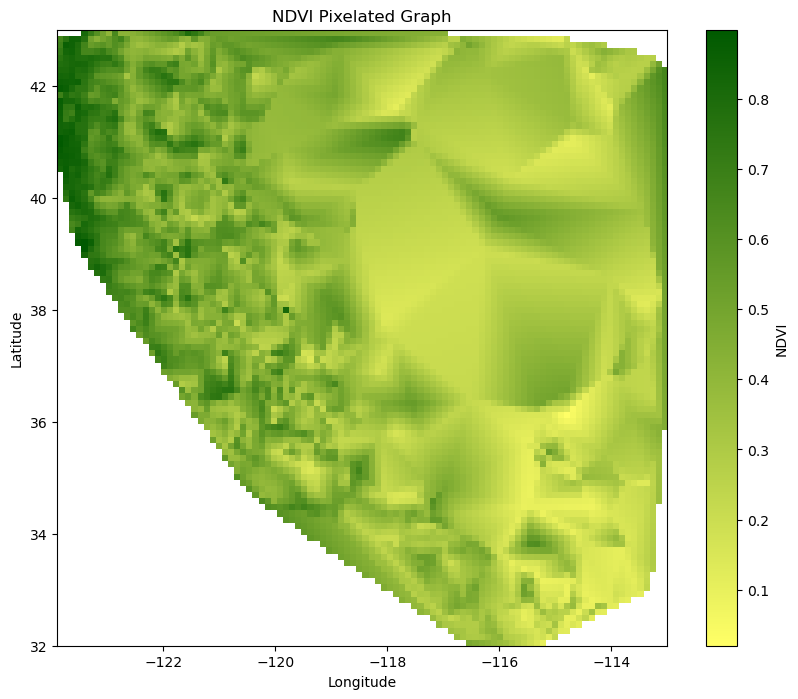

In [67]:
# Specify the desired month (e.g., June = 6) and year
target_month = 6  
target_year = 2023

# Filter the DataFrame for the target month (using the existing 'month' column)
df_filtered = df[df['month'] == target_month]
df_filtered = df[df['year'] == target_year]

# Drop records where NDVI is greater than 1
df_filtered = df_filtered[(df_filtered['NDVI'] >= 0) & (df_filtered['NDVI'] <= 1)]

# Extract the relevant columns from the filtered DataFrame
ndvi_data = df_filtered['NDVI'].values
latitude = df_filtered['lat_short'].values
longitude = df_filtered['long_short'].values

# Round latitude and longitude to 1 decimal place
latitude = np.around(latitude, decimals=1)
longitude = np.around(longitude, decimals=1)

# Create a grid of latitude and longitude
grid_x, grid_y = np.mgrid[longitude.min():longitude.max():100j, 
                         latitude.min():latitude.max():100j] 

# Use griddata to interpolate NDVI values onto the grid
grid_z = griddata((longitude, latitude), ndvi_data, (grid_x, grid_y), method='linear')

# Define the custom colormap
colors = [(1, 1, 0.4), (0, 0.35, 0)]  # Yellow to Green
cmap_name = 'ndvi_cmap'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)


# Create the pixelated graph with the custom colormap
plt.figure(figsize=(10, 8))
plt.imshow(grid_z.T, extent=(longitude.min()+0.1, longitude.max(), 
                            latitude.min(), latitude.max()-0.), 
           origin='lower', cmap=cm, interpolation='nearest')
plt.colorbar(label='NDVI')
plt.title('NDVI Pixelated Graph')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Axes: >

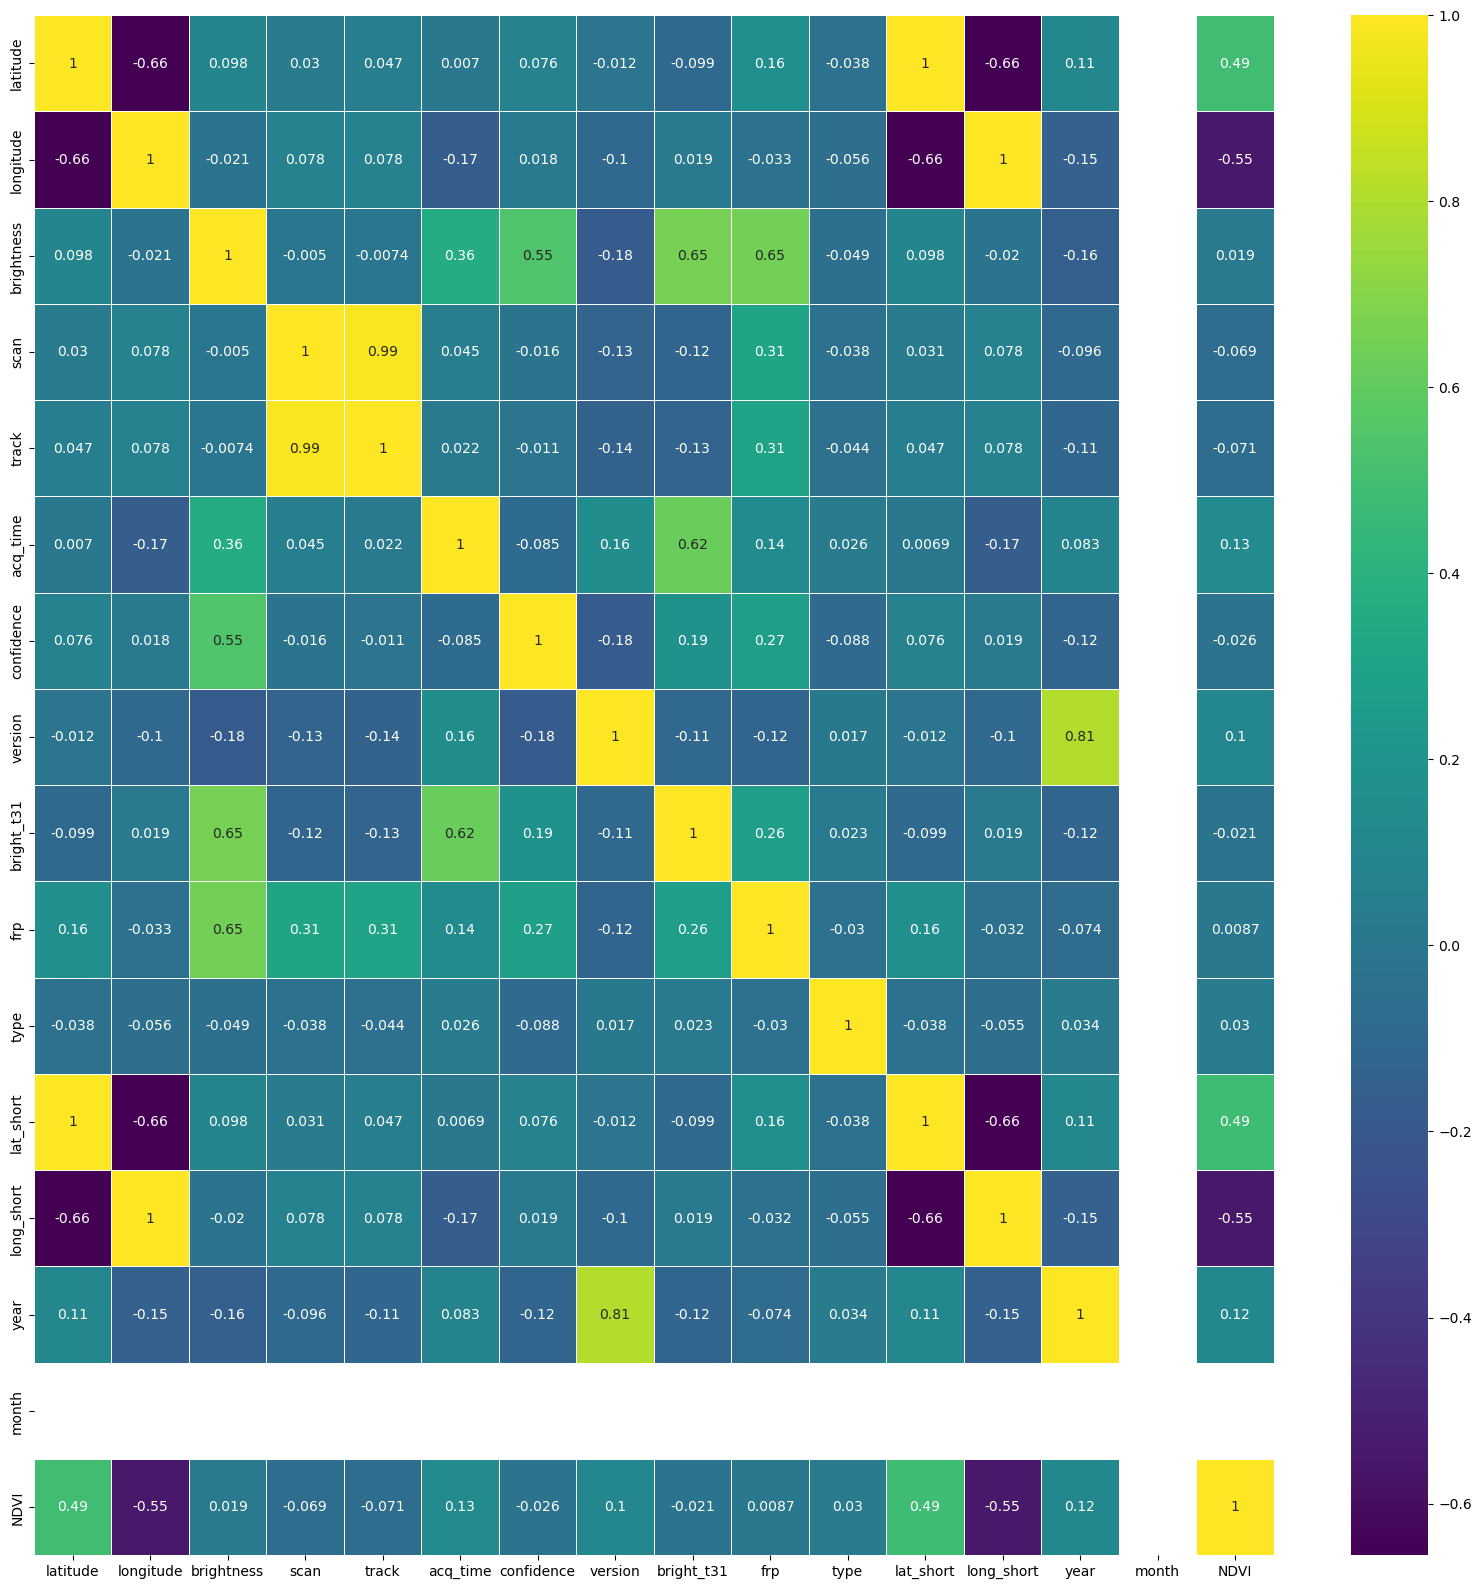

In [43]:
df_corr_matrix=df_filtered.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sb.heatmap(df_corr_matrix,annot=True,cmap='viridis',linewidths=.5)

In [44]:
df_filtered.min()

latitude          32.041
longitude      -123.7643
brightness         300.0
scan                 1.0
track                1.0
acq_date      2020-06-01
acq_time             436
satellite           Aqua
instrument         MODIS
confidence             0
version             6.03
bright_t31         267.3
frp                  3.4
daynight               D
type                   0
lat_short           32.0
long_short        -123.8
year                2020
month                  6
NDVI              0.0631
dtype: object

In [64]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9458 entries, 116852 to 126389
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    9458 non-null   float64
 1   longitude   9458 non-null   float64
 2   brightness  9458 non-null   float64
 3   scan        9458 non-null   float64
 4   track       9458 non-null   float64
 5   acq_date    9458 non-null   object 
 6   acq_time    9458 non-null   int64  
 7   satellite   9458 non-null   object 
 8   instrument  9458 non-null   object 
 9   confidence  9458 non-null   int64  
 10  version     9458 non-null   float64
 11  bright_t31  9458 non-null   float64
 12  frp         9458 non-null   float64
 13  daynight    9458 non-null   object 
 14  type        9458 non-null   int64  
 15  lat_short   9458 non-null   float64
 16  long_short  9458 non-null   float64
 17  year        9458 non-null   int64  
 18  month       9458 non-null   int64  
 19  NDVI        9458 non-null